# Проект "Самокаты"
Нам предоставили данные пользователей самокатов из разных городов. Мы располагаем данными о длительности и дальности поездок каждого пользователя, о том когда были сделаны эти поездки и в каком городе, а также имени, возрасте и типе подписки пользователя. Необходимо оценить различные параметры данных. чтобы достигнуть определенных целей, поставленных перед нами. Целью этого проекта является анализ данной бизнес-модели для принятий решений о том, как его дальше развивать. Чтобы достигнуть поставленных целей мы должны будем:
* улучшить качество предоставленных нам данных
* по улучшенным данным провести исследовательский анализ
* подготовить данные к проверке гипотез, которые выдвинул заказчик
* проверить гипотезы 

## Загрузка данных и общая информация
Загружаем нужные нам библиотеки и датафреймы, и получаем о них информацию.

### Загрузка данных

In [1]:
# добавляем нужные нам библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
# считываем csv-файлы и сохраняем их в датафреймы
df_user = pd.read_csv('/datasets/users_go.csv')
df_ride = pd.read_csv('/datasets/rides_go.csv')
df_sub = pd.read_csv('/datasets/subscriptions_go.csv')

### Общая информация

In [3]:
# выводим первые строки и общую информацию каждого набора данных 
print('Данные о пользователях')
display(df_user.head(10))
print()
df_user.info()
print()
print('Данные о поездках')
display(df_ride.head(10))
print()
df_ride.info()
print()
print('Данные о подписках')
display(df_sub)
print()
df_sub.info()

Данные о пользователях


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB

Данные о поездках


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB

Данные о подписках


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


### Вывод по главе
После первичного ознакомления с данными, можно сказать, что объем данных не очень большой - меньше мегабайта, что позволяет нам его обработать без особых проблем в pandas. Все датафреймы связаны между собой по определенному параметру - что позволит их позднее объединить в один общий датафрейм. Данные предоставлены за 2021 год - нынешняя ситуация может отличаться.

## Предобработка данных
Улучшаем качество предоставленных данных:
* ищем явные и неявные дубликаты
* ищем пропуски в данных
* переводим столбцы в нужный тип данных

### Поиск и устранение явных дубликатов

In [4]:
# поиск количества явных дубликатов в датасетах
duplicate_row_user = df_user[df_user.duplicated ()].count()
duplicate_row_ride = df_ride[df_ride.duplicated ()].count()
duplicate_row_sub = df_sub[df_sub.duplicated ()].count()

In [5]:
# вывод явных дубликатов в датасетах
print(duplicate_row_user)
print()
print(duplicate_row_ride)
print()
print(duplicate_row_sub)
print()

user_id              31
name                 31
age                  31
city                 31
subscription_type    31
dtype: int64

user_id     0
distance    0
duration    0
date        0
dtype: int64

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64



In [6]:
# удаление строк дубликатов
df_user = df_user.drop_duplicates(keep = 'first')

In [7]:
# поиск неявных дубликатов
df_user['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Были найдены явные дубликаты в датафрейме df_user в количестве 31 дублирующихся строк. Дубликаты были удалены. Неявные дубликаты выявлены не были. 

### Поиск пропущенных значений

In [8]:
# поиск кол-ва пропущенных значений по столбцам
print('кол-во пропущенных значений по столбцам')
print(df_user.isna().sum())
print()
print('кол-во пропущенных значений по столбцам')
print(df_ride.isna().sum())
print()
print('кол-во пропущенных значений по столбцам')
print(df_sub.isna().sum())

кол-во пропущенных значений по столбцам
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

кол-во пропущенных значений по столбцам
user_id     0
distance    0
duration    0
date        0
dtype: int64

кол-во пропущенных значений по столбцам
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


Пропущенных значений в датафреймах не было выявлено.

### Операции с датами

In [9]:
# приводим дату к формату datetime64
df_ride['date'] = pd.to_datetime(df_ride['date'], format='%Y-%m-%d')
# добавляем столбец с номером месяца
df_ride['month'] = df_ride['date'].dt.month

### Вывод по главе
Мы улучшили данные удалив строки дубликаты из df_user. А также изменив тип данных у столбца с данным поездок - приведя его к формату дат.

## Исследовательский анализ данных
В данной главе мы изучим и построим гистограммы по следующим параметрам:
* какие города встречаются чаще всего
* соотношение пользователей с подпиской и без подписки
* возраст пользователей
* сколько проезжают (в метрах) за одну поездку
* а также продолжительность этих поездок

### Частота встречаемости городов

кол-во городов
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


Text(0.5, 0, 'Города, название')

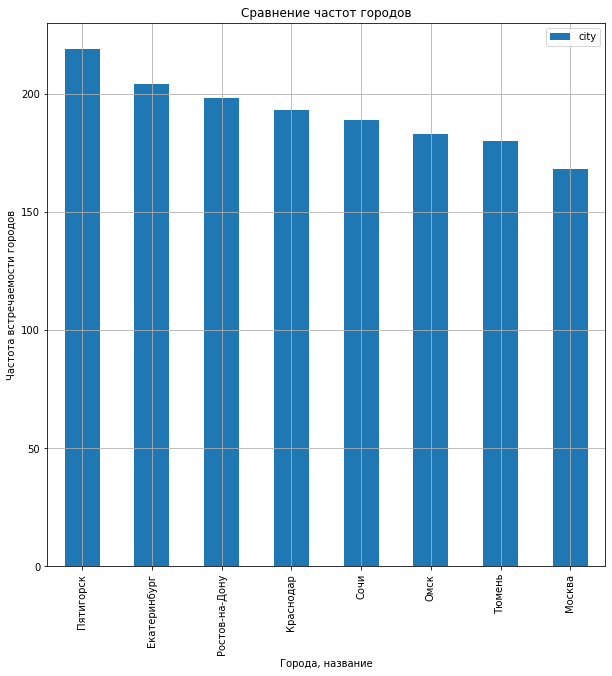

In [10]:
print('кол-во городов')
print(df_user['city'].value_counts())
df_user['city'].value_counts().plot(kind = 'bar', figsize = (10,10), grid = True, title = 'Сравнение частот городов', legend = True, y = 'Количество')
plt.ylabel('Частота встречаемости городов')
plt.xlabel('Города, название')

Самые большие любители самокатов в Пятигорске. Возможно это связано с тем, что это курортный город. Но почему тогда следом за ним идет Екатеринбург, а не Сочи - пока что непонятно. А на последнем месте расположилась Москва. Возможно это связано с тем, что в Москве сильно развита транспортная инфраструктура, и передвигаться легче на автобусах и метро.

### Соотношение пользователей с подпиской и без подписки

кол-во платных и бесплатных подписок
free     835
ultra    699
Name: subscription_type, dtype: int64


Text(0, 0.5, 'Тип подписки')

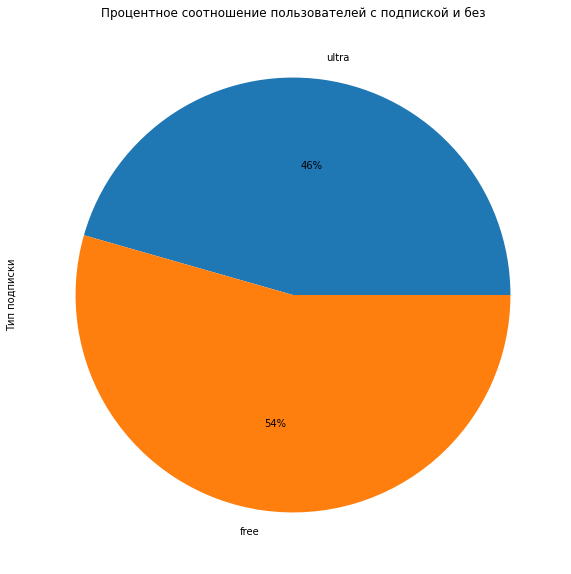

In [11]:
print('кол-во платных и бесплатных подписок')
print(df_user['subscription_type'].value_counts())
df_user['subscription_type'].value_counts(ascending = True).plot(kind = 'pie', figsize = (10,10), autopct='%1.0f%%', title = 'Процентное соотношение пользователей с подпиской и без')
plt.ylabel('Тип подписки')

Довольно логичный результат - бесплатных пользователей больше. Думаю, что очень малая часть людей постоянно арендует самокат, чтобы покататься. Из этого следует, что людям дешевле не платить за подписку - она просто не окупится. 

### Возраст пользователей

общие данные по возрасту
count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64


Text(0.5, 0, 'Возраст, года')

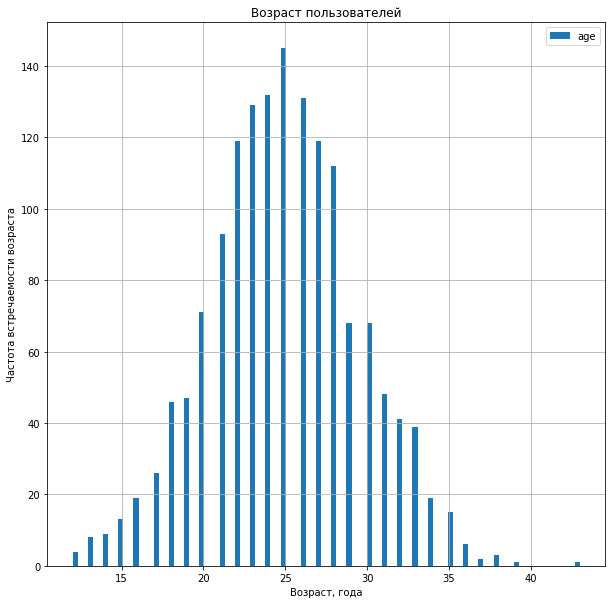

In [12]:
print('общие данные по возрасту')
print(df_user['age'].describe())
df_user['age'].plot(kind = 'hist', grid=True, figsize=(10,10), bins = 100, title = 'Возраст пользователей', legend = True)
plt.ylabel('Частота встречаемости возраста')
plt.xlabel('Возраст, года')

Средний возраст пользователей примерно от 20 до 30 лет. Для детей самокаты наверное слишком большие, а для пожилых людей крайне травмоопасные (хотя и для более молодых людей тоже). Отсюда и вполне логичный возраст пользователей.

### Расстояние, которое пользователь преодолел за одну поездку

общие данные по расстоянию
count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64


Text(0.5, 0, 'Расстояние, метры')

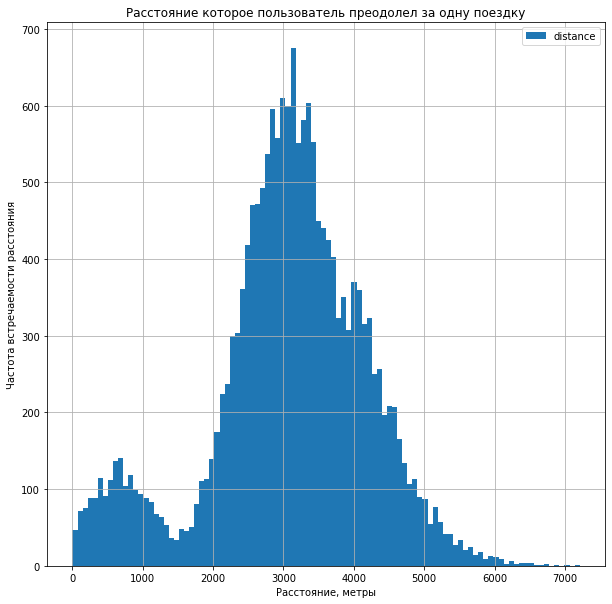

In [13]:
print('общие данные по расстоянию')
print(df_ride['distance'].describe())
df_ride['distance'].plot(kind = 'hist', grid=True, figsize=(10,10), bins = 100, title = 'Расстояние которое пользователь преодолел за одну поездку', legend = True)
plt.ylabel('Частота встречаемости расстояния')
plt.xlabel('Расстояние, метры')

График имеет бимодальное распределение. Большинство людей катаются от 2 до 4,5 км на самокатах. График имеет бимодальное распределение. Но есть второй "колокол" в котором дальность поездок около километра и меньше. Возможно люди используют самокат, чтобы быстро куда то добраться (магазин, работа, спортзал).

### Продолжительность поездок

общие данные по продолжительности поездок
count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64


Text(0.5, 0, 'Время, минуты')

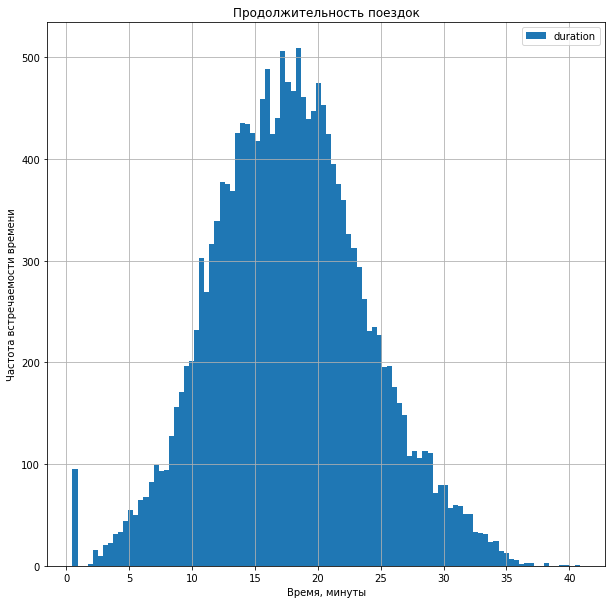

In [14]:
print('общие данные по продолжительности поездок')
print(df_ride['duration'].describe())
df_ride['duration'].plot(kind = 'hist', grid=True, figsize=(10,10), bins = 100, title = 'Продолжительность поездок', legend = True)
plt.ylabel('Частота встречаемости времени')
plt.xlabel('Время, минуты')

Средняя продолжительность поездок на самокате варьруется от 7 до 27 минут. Так же имеются непродолжительные поездки меньше 2-3 минут, которые связаны на предыдущем графике с поездками до 1 км.

In [15]:
# код ревьюера
df_ride[df_ride['duration']==0.5]

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


### Вывод по главе
* пользователей без подписки больше.
* больше всего пользователей самокатов в Пятигорске, меньше всего - в Москве.
* средний возраст от 20 до 30 лет.
* большая часть поездок от 2 до 4,5 км.

## Объединение и создание новых датафреймов
Для того, чтобы проверить интересующие нас гипотезы нам потребуется подготовить датафреймы:
* объединить все три датафрейма один
* на основе общего датафрейма создать два новых - с бесплатной и платной подписками
* визуализировать данные по двум новым датафреймам

### Объединение датафреймов

In [16]:
# последовательно соединяем датафреймы
df_temp = df_user.merge(df_ride, on = 'user_id', how = 'left')
df_all = df_temp.merge(df_sub, on = 'subscription_type', how = 'left')

In [17]:
# выведем первые строки нового датафрейма
df_all.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


In [18]:
# проверим, что мы не потеряли строки при объеденении
df_all.info()
# до объединения в датафрейме df_ride было 18068 записей - после объединения осталось такое же кол-во записей
# следовательно мы ничего не потеряли

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


### Создание новых датафреймов

In [19]:
# создаем новые датафреймы без и с подпиской
df_no_sub = df_all[df_all['subscription_type'] == 'free']
df_yes_sub = df_all[df_all['subscription_type'] == 'ultra']

### Визуализация новых датафреймов

Text(0.5, 0, 'Расстояние, метры')

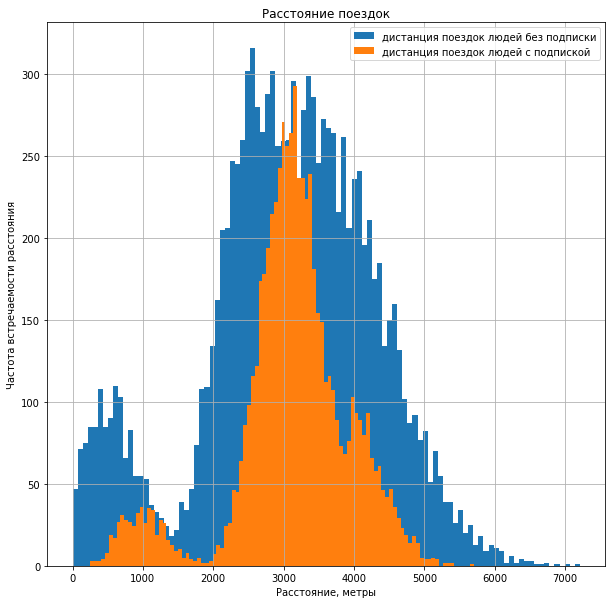

In [20]:
# визуализируем информацию о расстоянии поездок для пользователей обеих категорий
df_no_sub['distance'].plot(kind = 'hist', grid=True, figsize=(10,10), bins = 100, title = 'Расстояние поездок', legend = True)
df_yes_sub['distance'].plot(kind = 'hist', grid=True, figsize=(10,10), bins = 100, legend = True)
plt.legend(['дистанция поездок людей без подписки', 'дистанция поездок людей с подпиской'])
plt.ylabel('Частота встречаемости расстояния')
plt.xlabel('Расстояние, метры')

Text(0.5, 0, 'Время, минуты')

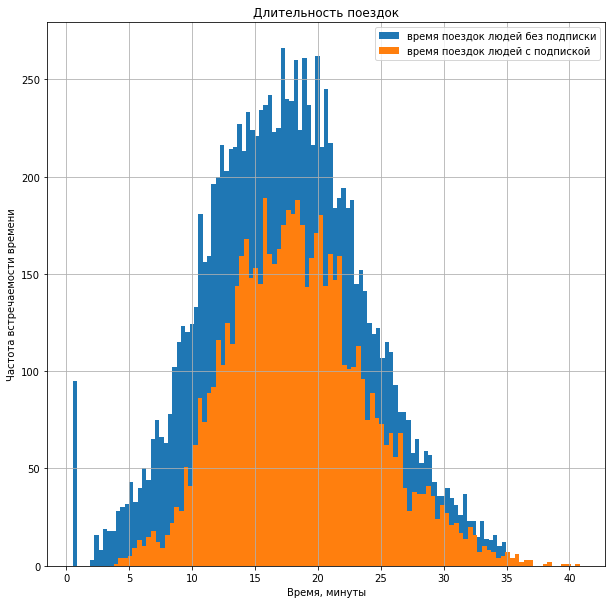

In [21]:
# визуализируем информацию о времени поездок для пользователей обеих категорий
df_no_sub['duration'].plot(kind = 'hist', grid=True, figsize=(10,10), bins = 100, title = 'Длительность поездок', legend = True)
df_yes_sub['duration'].plot(kind = 'hist', grid=True, figsize=(10,10), bins = 100, legend = True)
plt.legend(['время поездок людей без подписки', 'время поездок людей с подпиской'])
plt.ylabel('Частота встречаемости времени')
plt.xlabel('Время, минуты')

Возможно, что люди без подписки дольше и дальше катаются на самокатах. Исходя из этого следует проверить интересующие нас гипотезы.

### Вывод по главе
* объеденили все три датафрейма в один
* создали два отдельных датафрейма с пользователями без и с подпиской
* визуализировали данные по этим двум датафреймам

## Подсчёт выручки
Дополнительно к предыдущей главе - дополним датафреймы новым столбцом с помесячной выручкой для каждого пользователя.

### Округляем и переводим значения в новый тип данных

In [22]:
# округляем значения
df_all['duration'] = np.ceil(df_all['duration'])
# переводим значения в новый тип данных
df_all['duration'] = pd.to_numeric(df_all['duration'], downcast = 'integer')

### Находим суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц

In [23]:
# строим таблицу с суммарным расстоянием, количеством поездок и суммарным временем для каждого пользователя за каждый месяц
df_all_by_user = df_all.groupby(['user_id', 'month'])[['duration', 'distance', 'month']].agg({'duration': 'sum', 'distance': 'sum', 'month': 'count'})

In [24]:
# переименовываем столбцы и применяем reset_index чтобы столбцы по которым группировали не стали индексами и мы могли проводить над ними операции
df_all_by_user.rename(columns = {'duration': 'total_duration', 'distance': 'total_distance', 'month': 'total_rides'}, inplace = True)
df_all_by_user = df_all_by_user.reset_index()

In [25]:
# добавляем тип подписки в датафрейм. цены подписок и поездок
df_all_by_user = pd.merge(df_all_by_user, df_user[['user_id', 'subscription_type']], on='user_id', how='left')
df_all_by_user = pd.merge(df_all_by_user, df_sub, on='subscription_type', how='left')

В total_duration были float значения - видимо в этом столбце были NaN значения после группировки, они в свои очередь имеют тип float.
Дополнительно переводим total_duration в тип данных int:

### Добавляем столбец с помесячной выручкой, которую принёс каждый пользователь

In [26]:
# объявляем функцию для подсчета ежемесячной выручки для каждого пользователя
def month_profit_func (row):
    return row['minute_price'] * row['total_duration'] + row['subscription_fee'] + row['start_ride_price'] * row['total_rides']
# применяем функцию к датафрейму
df_all_by_user['month_profit'] = df_all_by_user.apply(month_profit_func, axis=1)
# смотрим что все получилось
df_all_by_user

,user_id,month,total_duration,total_distance,total_rides,subscription_type,minute_price,start_ride_price,subscription_fee,month_profit
0,1,1,42.0,7027.511294,2,ultra,6,0,199,451.0
1,1,4,7.0,754.159807,1,ultra,6,0,199,241.0
2,1,8,46.0,6723.470560,2,ultra,6,0,199,475.0
3,1,10,32.0,5809.911100,2,ultra,6,0,199,391.0
4,1,11,56.0,7003.499363,3,ultra,6,0,199,535.0
...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,26.0,3409.468534,2,free,8,50,0,308.0
11327,1534,8,48.0,7622.453034,2,free,8,50,0,484.0
11328,1534,9,23.0,4928.173852,1,free,8,50,0,234.0
11329,1534,11,78.0,13350.015305,4,free,8,50,0,824.0


### Вывод по главе
Была посчитана помесячная выручка для каждого пользователя. Это поможет нам в проверке одной из гипотез.

## Проверка гипотез
Заключительная глава нашего проекта в которой мы производим проверку гипотез:
* Тратят ли пользователи с подпиской больше времени на поездки?
* Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
* Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?
А также ответ на проверочный вопрос:
* Какой тест понадобится для проверки гипотезы на основе предоставленной ситуации?

### Тратят ли пользователи с подпиской больше времени на поездки?

Сформулируем нулевую и альтернативную теории:
* H0 - пользователи с подпиской тратят столько же времени на поездки, сколько и пользователи без подписки
* H1 - пользователи с подпиской тратят больше времени на поездки

In [27]:
# время на поездки у пользователей с подпиской
sub = df_yes_sub['duration']
# время на поездки у пользователей без подписки
unsub = df_no_sub['duration']
# уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(sub, unsub, alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')
    print()
print()
print('Среднее значение продолжительности поездки пользователей с подпиской')
print()
print(sub.mean())
print()
print('Среднее значение продолжительности поездки пользователей без подписки')
unsub.mean()

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу

Среднее значение продолжительности поездки пользователей с подпиской

18.54198516280583

Среднее значение продолжительности поездки пользователей без подписки


17.39090929866399

Судя по результатам можно предположить, что люди с подпиской тратят больше времени на поездки, чем люди без подписки.

### Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Сформулируем нулевую и альтернативную теории:
* H0 - пользователи с подпиской проезжают 3130 метров за одну поездку
* H1 - пользователи с подпиской проезжают расстояние за одну поездку, превышающее 3130 метров

In [28]:
# дистанции поездок у пользователей с подпиской
sub_dist = df_yes_sub['distance']

# заданное нам расстояние
control_dist = 3130

# уровень статистической значимости
alpha = 0.05

results = st.ttest_1samp(sub_dist, control_dist, alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')
    print()
print('Среднее значение дальности поездки пользователей с подпиской')
print()
print(sub_dist.mean())

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу

Среднее значение дальности поездки пользователей с подпиской

3115.4453880370247


Судя по результатам можно предположить, среднее расстояние, которое проезжают пользователи с подпиской не имеет статистически значимых отличий от заданного расстояния в 3130 метров, следовательно чрезмерного износа самокатов не будет.

### Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Сформулируем нулевую и альтернативную теории:
* H0 - помесячная выручка от пользователей с подпиской такая же как у пользователей без подписки
* H1 - помесячная выручка от пользователей с подпиской выше, чем у пользователей без подписки

In [29]:
# месячный доход от подписчиков
sub_month = df_all_by_user[df_all_by_user['subscription_type'] == 'ultra']['month_profit']
# месячный доход от пользователей без подписки
unsub_month = df_all_by_user[df_all_by_user['subscription_type'] == 'free']['month_profit']
# уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(sub_month, unsub_month, alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')
print()
print('Среднее значение выручки пользователей с подпиской')
print()
print(sub_month.mean())
print()
print('Среднее значение выручки пользователей без подписки')
unsub_month.mean()

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу

Среднее значение выручки пользователей с подпиской

362.7921906022502

Среднее значение выручки пользователей без подписки


328.6413651073845

Судя по результатам можно предположить, что люди с подпиской действительно приносят больше дохода, чем люди без подписки.

### Какой тест понадобится для проверки гипотезы на основе предоставленной ситуации?

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Данный тип гипотез - это гипотеза о равенстве средних для зависимых (парных) выборок. Метод python, который мы применим, выглядит следующим образом: scipy.stats.ttest_rel().

## Общий вывод

### Предобработка данных
Качество данных возросло, благодаря:
* Устранению явных дубликатов - были удалены 31 строки дубликаты
* Тип данных был изменен там, где это было необходимо в столбце date в df_ride
В целом предоставленные данные были довольно хорошо составлены и не имели критических недочетов.

### Исследовательский анализ данных 
Исследовательский анализ данных был произведен в полном объеме и включал в себя:
* анализ частоты встречаемости городов, который показал, что в Пятигорске больше всего пользователей самокатов, а в Москве меньше всего
* анализ соотношения пользователей с подпиской и без подписки,который показал, что доля людей без подписки выше и составляет 54%
* анализ возраста пользователей, который показал, что средний возраст пользователей варьируется от 20 до 30 лет
* анализ расстояния, которое пользователь преодолел за одну поездку показал, что в среднем пользователи преодолевают расстояние от 2 до 4,5 км.
* анализ продолжительности поездок показал, что пользователи в среднем катаются от 7 до 27 минут.

### Исследование запросов заказчика
Задачи выполнены в полном объеме и были получены следующие результаты:
* люди с подпиской тратят больше времени на поездки, чем люди без подписки
* среднее расстояние, которое проезжают пользователи с подпиской не имеет статистически значимых отличий от заданного расстояния в 3130 метров, следовательно чрезмерного износа самокатов не будет
* люди с подпиской действительно приносят больше дохода, чем люди без подписки

### Итог
Работа была произведена в полном объеме, все поставленные цели и задачи были выполнены.